В цьому домашньому завданні відпрацюємо з вами знання, отримані в модулі зі статистики.

**Завдання 1.** Ми обговорили з Вами на лекції, що велика літера Сігма грецького алфавіту позначає в математиці суму. Знайдіть з використанням Python $\Sigma x$, $\Sigma x^2$, та $\Sigma (x-1)^2$ для наступного набору даних:
`1 3 4`
Виведіть результат кожного обчислення на екран.

In [1]:
data = [1, 3, 4]
sum_x = sum(data)
print(sum_x)
sum_x2 = sum(x**2 for x in data)
print(sum_x2)
sum_x_minus_1_2 = sum((x - 1)**2 for x in data)
print(sum_x_minus_1_2)

8
26
13


**Завдання 2.** Ми зібрали дані про суму покупок в гривнях 20ма випадково обраними клієнтами в нашому магазині (всього клієнтів у нас більше) за минулий місяць. Вони представлені в змінній `sum_purchases`. Знайдіть **вибіркове середнє** для цих даних кожним з зазначених методів:   

  2.1. без використання жодних бібліотек, користуючись тільки Python.  
  2.2. використовуючи відповідний метод бібліотеки `numpy`.

  Виведіть результат обчислень в кожному з випадків на екран та порівняйте результати. Вони співпадають?

In [2]:
sum_purchases = [ 316,  493,  367,  153,  224,  121,  322,  450,  196,  397,  281,
  239,  484,  124,  223,  448,  432,  255, 4310, 3524]

In [3]:
import numpy as np
mean_manual = sum(sum_purchases) / len(sum_purchases)
print(mean_manual)

mean_numpy = np.mean(sum_purchases)
print(mean_numpy)

667.95
667.95


**Завдання 3.** Для того ж набору даних в змінній `sum_purchases` обчисліть **медіану** кожним з зазначених методів:  

  3.1. без використання жодних бібліотек, користуючись тільки Python.  
  3.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран. Порівняйте результати зі значенням вибіркового середнього. Напишіть коментар, для яких задач ви б використовували вибіркове середнє, а для яких - медіану?

In [5]:
sorted_purchases = sorted(sum_purchases) 
n = len(sorted_purchases)
if n % 2 == 0:
    median_manual = (sorted_purchases[n//2 - 1] + sorted_purchases[n//2]) / 2
else: median_manual = sorted_purchases[n//2] 
print(median_manual)


median_numpy = np.median(sum_purchases)
print(median_numpy)

319.0
319.0


**Завдання 4**. Обчислість стандартне відхилення наведеної вибірки в змінній `sum_purchases` кожним з зазначених методів:  

  4.1. без використання жодних бібліотек, користуючись тільки Python.  
  4.2. використовуючи відповідний метод бібліотеки numpy.  

Виведіть результат обчислень в кожному з випадків на екран.

In [6]:

squared_diff = [(x - mean_manual) ** 2 for x in sum_purchases]
variance = sum(squared_diff) / (len(sum_purchases) - 1)
std_deviation = variance ** 0.5
print(std_deviation)


std_deviation_np = np.std(sum_purchases, ddof=1)
print(std_deviation_np)

1124.5433447451132
1124.5433447451132


**Завдання 5**. Ми провели дослідження віку студентів-першокурсників. Виявилось, що
- 10 студентів мають вік 16 років
- 25 студентів - 17 років
- 20 студентів - 18 років
- 2 студенти - 20 років

Обчислість середнє значення для цієї вибірки будь-яким способом - на чистому Python або з numpy - та виведіть результат на екран.

In [8]:
ages = np.array([16, 17, 18, 20])
counts = np.array([10, 25, 20, 2])

mean_age_np = np.average(ages, weights=counts)
print(mean_age_np)

17.280701754385966


**Завдання 6**. Крім даних про суму покупок, ми зібрали ще дані про кількість відвідувань кожного з кожного покупця, які знаходяться в змінній `visits`. Обчисліть коефіцієнт кореляції Пірсона для суми покупок і кількості відвідувань кожним з зазначених методів:  

  6.1. без використання жодних бібліотек, користуючись тільки Python.  
  6.2. використовуючи відповідний метод бібліотеки numpy.  
  
Виведіть результат на екран. Проаналізуйте результат.

Виведіть додатково графік розсіювання викликавши код нижче і зробіть заключення, чи варто щось змінити при підрахунку кореляції, аби коефіцієнт Пірсона показував коректну оцінку лінійної залежності?

In [10]:
visits = [ 6,  2, 10,  3,  9,  9,  2,  3,  6,  6, 10,  2,  5, 10,  3,  5,  4,
        7,  4,  2]

In [12]:
mean_visits = sum(visits) / len(visits) 
mean_purchases = sum(sum_purchases) / len(sum_purchases)

numerator = sum((x - mean_purchases) * (y - mean_visits) for x, y in zip(sum_purchases, visits))

denom_purchases = sum((x - mean_purchases) ** 2 for x in sum_purchases)
denom_visits = sum((y - mean_visits) ** 2 for y in visits)

denominator = (denom_purchases * denom_visits) ** 0.5

pearson_corr = numerator / denominator
print(pearson_corr)

pearson_corr_numpy = np.corrcoef(sum_purchases, visits)[0, 1]
print(pearson_corr_numpy)


-0.30265844687666454
-0.3026584468766646


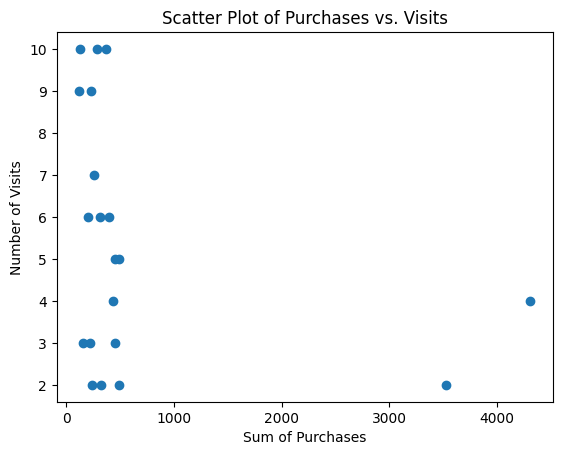

In [13]:
import matplotlib.pyplot as plt

plt.scatter(sum_purchases, visits)
plt.title('Scatter Plot of Purchases vs. Visits')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits');

Кореляція є слабкою і негативною.Кореляція близька до 0 зв'язок між сумою покупок і кількістю відвідуван дуже низький. Це означає, що, як правило, зі збільшенням кількості відвідувань сума покупок може дещо зменшуватися, проте цей зв'язок не є сильним

**Завдання 7**. В попередньому завданні ми помітили, що викиди нам заважають отримати "правдиве" значення кореляції. Давайте вилучимо записи, які відповідають значенням з викидами в сумі покупок і обчисліть коеф. кореляції. Для цього поставте `threshold`, який дорінює середньому значенню + 2 стандартних вдіхилля суми покупок і всі значення, які більше за нього, будемо вважати викидами (є і інші правила для визначення викидів - з ним и познайомимось пізніше).

Вилучіть значення з обох масивів і обчисліть коеф. кореляції Пірсона з допомогою `numpy` для кількості візитів і суми покупок без записів-викидів. Виведіть результат на екран, побудуйте діаграму розсіювання і проаналізуйте результат: що можемо сказати про залежність в даних?

-0.3685212078127797


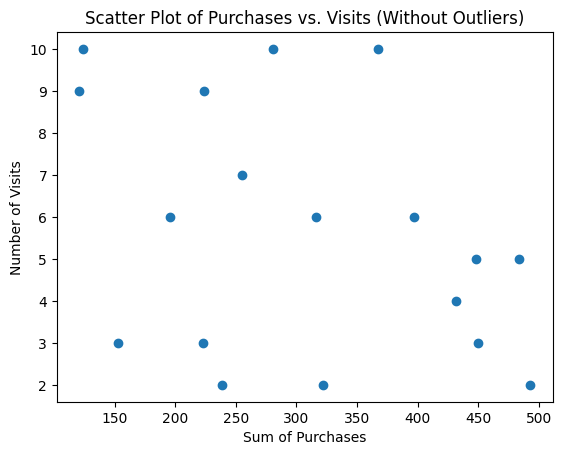

In [18]:
mean = np.mean(sum_purchases)
std_dev = np.std(sum_purchases)

threshold = mean + 2 * std_dev

filtered_sum_purchases = [x for x in sum_purchases if x <= threshold]
filtered_visits = [visits[i] for i in range(len(sum_purchases)) if sum_purchases[i] <= threshold]
        
correlation_coefficient = np.corrcoef(filtered_sum_purchases, filtered_visits)[0, 1]
print(correlation_coefficient)


plt.scatter(filtered_sum_purchases, filtered_visits)
plt.title('Scatter Plot of Purchases vs. Visits (Without Outliers)')
plt.xlabel('Sum of Purchases')
plt.ylabel('Number of Visits')
plt.show()

Коли ми вилучили записи з викидами, ми отримали більш точну оцінку кореляції. Але бачимо що точки розкидані без чіткої структури, це може означати, що залежність не є лінійною. Зростання суми покупок не обов'язково пов'язане зі збільшенням кількості відвідувань.